# Pandas and Matplotlib Homework

In [39]:
#load the libraries using the normal convention
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
##prevent plotting errors
%matplotlib inline

In [2]:
#Load our excel files of interest into pandas
NHL_Goalies = pd.read_excel('NHLGoalies2016_2017.xls',na_values='',sheetname=0) 
GAA_ = pd.read_excel('NHLGoalies2016_2017.xls',na_values='',sheetname='5vs5')

/Users/Alice/miniconda2/envs/myenv/lib/python3.7/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


#Appendix:
 1. DF = Pandas DataFrame
 2. NHL_Goalies DF = NHL_Goalies 
 3. GAA_ DF = GAA_

### Q1A) Create a new DF (*called NHL_Ones*) by:
#### Filtering the correct DF for Goalies that played 1 game <font color='red'> (GP = Games played)</font>

Notes: How would you find the 'GP' column in these files?

In [3]:
#Answer 1A:
#NHL_Goalies_GP = NHL_Goalies[["GP"]]
#print(NHL_Goalies_GP)

NHL_Ones = NHL_Goalies.loc[NHL_Goalies['GP'] == 1]

#print(NHL_Ones)
#print(NHL_Ones['GP'])


 ## Q1B) 
 #### A. Find the value of the minimum Salary for the entire dataset 
 #### B. Replace the missing values from the NHL_Ones DF with this
 #### C. Create a new DF after replacement by **adding** a column called  "Adjusted_Salary"
 #### D. I would like to only see the old "Salary" column and the "Adjusted Salary" column from the new Dataframe

#### Notes:
1. Note where the minimum Salary value is coming & where you are going to assign it to
2. Read up on **replacement** of missing values
3. Look up Numpy definition for null
4. Look up Pandas **Series** Naming 
5. Review concat function in Pandas
6. Review how to slice columns

In [6]:
#Answer 1Ba:
min_salary = NHL_Goalies['Salary'].min()
print(min_salary)

#Answer 1Bb:
print(NHL_Ones['Salary'])

#NHL_Ones_Modified=NHL_Ones
#NHL_Ones_Modified['Salary'] = NHL_Ones_Modified['Salary'].fillna(min_salary)

#print(NHL_Ones_Modified['Salary'])
#print(NHL_Ones_Modified)

#Answer 1Bc
#I don't understand this question: why create another column if it's just a duplicate of the first column?
#Therefore, I've instead elected to only create a new column, and not modify the original column

NHL_Ones['Adjusted_Salary'] = NHL_Ones['Salary']
#print(NHL_Ones['Salary'])
#print(NHL_Ones['Adjusted_Salary'])
NHL_Ones['Adjusted_Salary'].fillna(min_salary, inplace=True)

#Answer 1Bd
#I have been unsuccessful in preserving the original salary column
print(NHL_Ones['Salary','Adjusted_Salary'])
#print(NHL_Ones['Salary'])


575000.0
1          NaN
13         NaN
14    575000.0
16    708750.0
22    780000.0
27    650000.0
29    925000.0
32         NaN
42    575000.0
50    673334.0
67         NaN
80         NaN
87    832500.0
89         NaN
90    892500.0
Name: Salary, dtype: float64


/Users/Alice/miniconda2/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Alice/miniconda2/envs/myenv/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


KeyError: ('Salary', 'Adjusted_Salary')

### Q2) A. Subset the NHL goalies data to include Goalies that played in more than 25 games AND have a GAA lower than 3.00 and store the New DF as 'workhorse'


Notes: 
1. Review notes creating "boolean" masks
2. Internet search for Multiple Boolean indexing on multiple columns in a Pandas DataFrame

In [10]:
#Answer 2:
workhorse = NHL_Goalies[(NHL_Goalies['GP']>25) & (NHL_Goalies['GAA']<3)]

### Q3. Create 2 python functions that: 
<br> </br>
#### A. Creates/*Returns* a new DataFrame that displays the number of missing values in every column. 
#### This new DataFrame has one new column named "Missing" with the sum of the missing values from the columns

### Notes 
***Function takes one argument: An input DataFrame***
<br> </br>
<br> </br>
** One Proposed method:**
1. Create a pandas series object from the sum of the nulls in every column
2. Convert the series object to a DataFrame and pass the list of column names from the input DataFrame as the index. (read Pandas Help online)
3. During the conversion of the series object to a DataFrame pass a columns argument to create a name for the new Output DataFrame's Column.

### Expected Output:
<img src='Missing_cols_expectedoutput.png'>

In [25]:
# Answer 3A: CODE HERE; Please comment each part

#create an object that sums the number of nulls in each column
na_count = NHL_Ones.isna().sum()

#Convert the series object to a DataFrame and pass the list of column names from the input DataFrame as the index
print(type(na_count))
#print(na_count)

#NHL_Ones_long = NHL_Ones.append(na_count, ignore_index=True)
#print(NHL_Ones_long)


<class 'pandas.core.series.Series'>


#### B. Creates a new *column* called 'missing_values' in the input DF that sums the missing values in each row.

### Notes: 
***Function takes one argument: An input DataFrame***
<br> </br>
<br> </br>
Check out how to use axis argument and how to create new columns in an existing dataframe

### Expected Output:
<img src= 'missingrows_expectedoutput.png'>

In [37]:
#Answer 3B here; Please comment each part

na_row_count = NHL_Ones.shape[1] - NHL_Ones.count(axis=1)

NHL_Ones["Nas"]=na_row_count

print(NHL_Ones[['Last Name','Nas']])

      Last Name  Nas
1         Alves   18
13     Campbell   11
14       Comrie    7
16       Copley   10
22     Driedger    8
27     Forsberg    8
29      Gillies    3
32   Gudlevskis   12
42        Jarry    7
50    Langhamer    9
67  Nedeljkovic   11
80      Rittich   15
87       Subban    7
89     Tokarski   11
90      Ullmark    8


/Users/Alice/miniconda2/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### Q4) Matplotlib Question Plot in one figure and 2 side by side plots:
<br> </br>
#### A. Plot the histogram of the all the GAA of the NHL_Goalies DF  AND the goalies that played in more than 25 games with a GAA < 3.00, 
#### B. Label the Titles of the plots differently (*ie EntireSet + Subset*)
#### C. Change the color of one of the plots from the default

(array([3., 4., 3., 7., 2., 6., 9., 1., 5., 4.]),
 array([2.05553358, 2.14782439, 2.24011521, 2.33240603, 2.42469685,
        2.51698767, 2.60927848, 2.7015693 , 2.79386012, 2.88615094,
        2.97844175]),
 <a list of 10 Patch objects>)

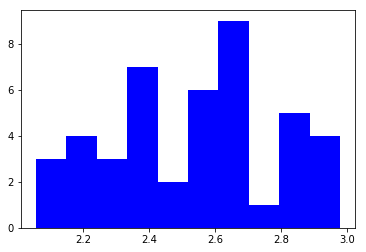

In [50]:
plt.hist(workhorse['GAA'],color='Blue',label='Subset')

(array([ 5.,  1.,  3., 21., 37., 17.,  6.,  2.,  1.,  2.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

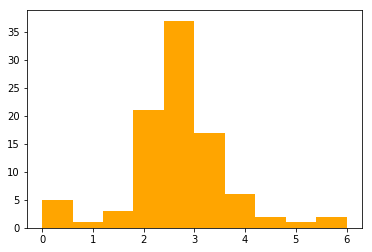

In [51]:
plt.hist(NHL_Goalies['GAA'],color='Orange',label='EntireSet')

# Notes

1. convert your column of interest into a NumPY array (look up online for usage)
2. Review: https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html

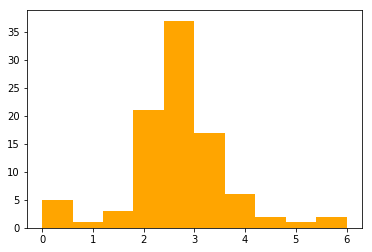

In [49]:
#Answer 4 here: please comment


### Q5) GroupBy Question
##### 1. Subset the NHL_Goalies DataFrame where Injuries is not known <font color='red'>(Injuries=NaN)</font>; 
##### 2. Use a Merge with the GAA_  DF to produce a NEW DF (*called mergedDF*) 
###### *** USE A JOIN THAT PRESERVES ORDER AND USES THE INTERSECTION OF KEYS***
###### *** USE BOTH THE LEFT AND RIGHT INDEXES AS JOIN KEYS***
##### 3. From the mergedDF keep FirstName/LastName/Team/Cntry/ SV% /GA/GAA/ TOI (note one copy for any duplicate column)
##### 4. GroupBy country on mergedDF and aggregate The Means, Mins, and Maximum of the kept columns
#### 5. Create a dataframe of the <font color='red'>TOI </font>groupby object and write it to a comma seperated value file called ('TOI_2017.csv')

## Notes:

1. Review or read up pandas documentation on:
    - how to create selection criteria
    - how aggs/joins work: https://pandas.pydata.org/pandas-docs/stable/merging.html
2. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html
3. https://stackoverflow.com/questions/14734533/how-to-access-pandas-groupby-dataframe-by-key
4. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.get.html

In [ ]:
#Answer 5 here: please comments


# Q6) Write a function(s)  
## that subsets a dataframe by removing rows that are WITHIN the InterQuartile Region of a specified column
<br> </br>
### The function takes as input 
##### A: Pandas_Dataframe (For example use NHL_GoaliesDF)
##### B. Column name
### Add a condition that returns an error if the Column Name chosen is not:
##### A. Numeric Dtype
##### B. Does not exist in the Numeric Columns
### The output is a DataFrame that removes rows outside of the specified columns IQR
<br> </br>
<font color='red'>**You can use smaller helper functions **<font>
<br> </br>
See --> <href>=https://en.wikipedia.org/wiki/Interquartile_range</href>
#hint: There are several pandas subfunctions that can be useful

In [ ]:
#Answer Question 6 here